In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

c:\Users\yuqin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#数据导入
path='winequality-red.csv'
df = pd.read_csv(path,sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


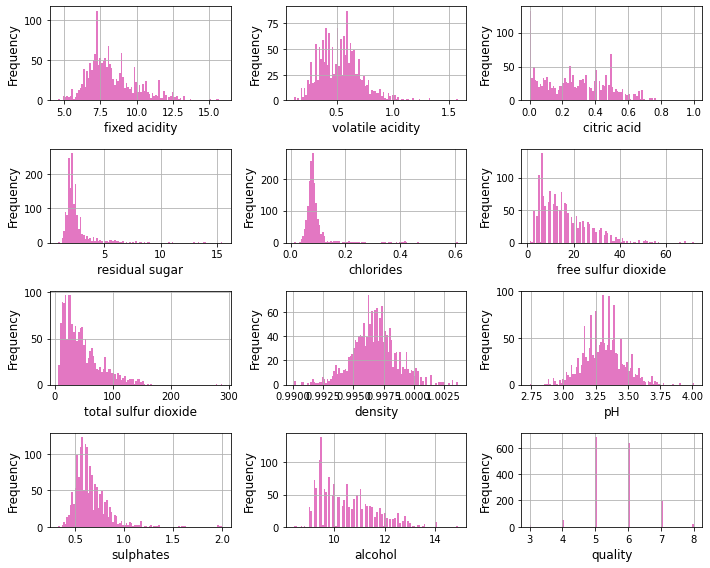

In [4]:
#数据分布直方图
color = sns.color_palette()
column= df.columns.tolist()
fig = plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    df[column[i]].hist(bins = 100,color = color[6])
    plt.xlabel(column[i],fontsize = 12)
    plt.ylabel('Frequency',fontsize = 12)
plt.tight_layout()
plt.show()
fig.savefig('hist.jpg')

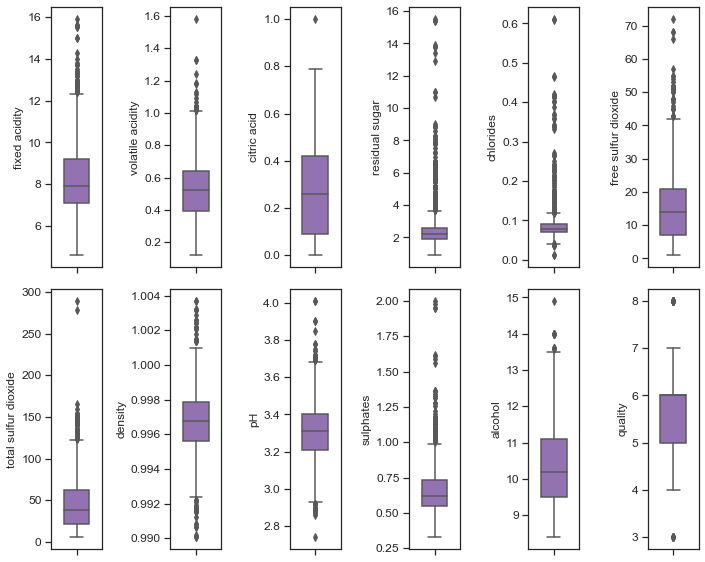

In [122]:
#数据分布箱型图
fig = plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(2,6,i+1)
    sns.boxplot(df[column[i]],orient = 'v',width = 0.5,color = color[4])
    plt.ylabel(column[i],fontsize = 12)
plt.tight_layout()
plt.show()
fig.savefig('box.jpg')


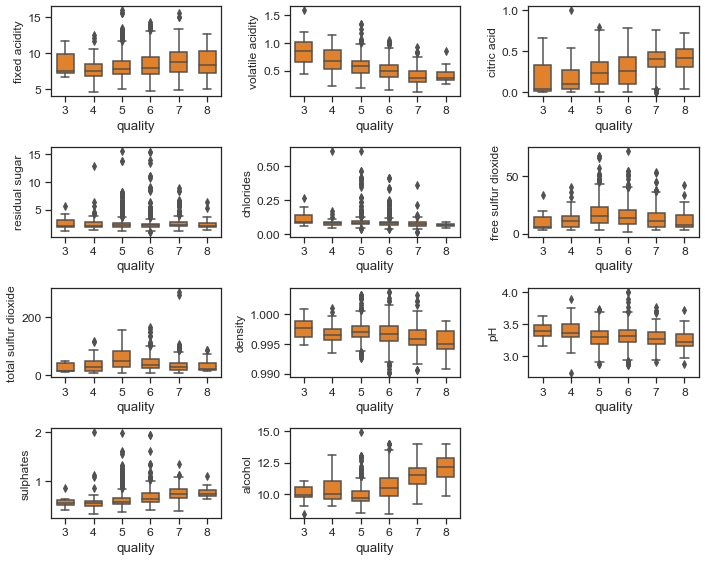

In [5]:
#数据关系箱型图
sns.set_style('ticks')
sns.set_context('notebook',font_scale = 1.1)
columns = df.columns.tolist()
columns.remove('quality')
columns
column = columns[0:11]
fig = plt.figure(figsize = (10,8))
for i in range(11):
    plt.subplot(4,3,i+1)
    sns.boxplot(x = 'quality',y = column[i], data = df,color = color[1],width = 0.6)
    plt.ylabel(column[i],fontsize = 12)
plt.tight_layout()
plt.show()
fig.savefig('q-box.jpg')


<ipython-input-6-e21fed869bfe>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(mcorr,dtype = np.bool)


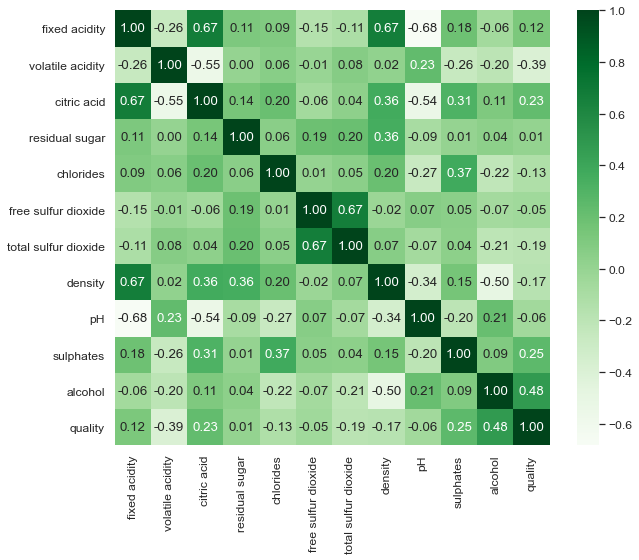

In [6]:
#相关系数图
sns.set_style('dark')
fig = plt.figure(figsize = (10,8))
column = df.columns.tolist()
mcorr = df[column].corr()
mask = np.zeros_like(mcorr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr,  cmap='Greens', square=True, annot=True, fmt='0.2f')
plt.show()
fig.savefig('hotmap.jpg')



In [7]:
#数据处理的类定义
class wine():
    def getCsv(self, path):
        '''
        通过路径读取csv文件
        :param path:csv文件路径
        :return:DataFrame
        '''
        try:
            df = pd.read_csv(path,sep = ';')
        except Exception:
            print('数据集读取异常，请检查路径！')
        return df

    def getCleanData(self, df):
        '''
        检查数据集是否存在缺失和重复，清洗数据
        :param df 待处理的dataframe
        :return:DataFrame 
        '''
        if sum(df.isnull().sum()):
            print('数据存在缺失值，将对缺失值进行删除处理！')
            df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)
        if df.duplicated().any():
            print('数据存在重复值，将对重复值进行删除处理！')
            df = df.drop_duplicates(subset=None, keep='first', inplace=False)
        return df

    def getSplitData(self, df, test_size=0.25):
        '''
        切割数据集，同时进行标准化处理，返回训练与测试需要的特征值和目标值
        :param df 待处理的dataframe test_size 数据分割比例
        :return:x_train, x_test, y_train, y_test
        '''
        y_data = df['quality']
        x_data = df.drop("quality", axis=1)
        # 分割数据，75%为训练集合，25%为测试集合
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_size)
        return x_train, x_test, y_train, y_test

    def getStandardData(self, x_array):
        '''
        特征工程（标准化数据，防止部分数据过大或者过小等问题造成数据权重失效），这里只用对特征数据处理，目标数据无需特征化
        :param x_array 待处理的数组
        :return:x_array
        '''
        sd = StandardScaler()
        x_array = sd.fit_transform(x_array)
        return x_array
    
    def getTrainData(self, path):
        '''
        获得处理后的训练集和测试集。
        :param path:csv文件路径
        :return:x_train, x_test, y_train, y_test
        '''
        df = self.getCsv(path)
        df = self.getCleanData(df)
        x_train, x_test, y_train, y_test = self.getSplitData(df)
        x_train = self.getStandardData(x_train)
        x_test = self.getStandardData(x_test)
        return x_train, x_test, y_train, y_test 



In [8]:
wine = wine()
X_train, X_test, y_train, y_test = wine.getTrainData(path)

数据存在重复值，将对重复值进行删除处理！


In [111]:
#模型预测
lgr = LogisticRegression()
svc = SVC(kernel='linear')
rfc0 = RandomForestClassifier(n_estimators=6,max_depth=10,max_features='auto')
rfc = RandomForestClassifier(n_estimators=200,max_depth=10,max_features='auto')

lgr.fit(X_train, y_train)
svc.fit(X_train, y_train)
rfc0.fit(X_train, y_train)
rfc.fit(X_train, y_train)

pred_lgr = lgr.predict(X_test)
pred_svc = svc.predict(X_test)
pred_rfc0 = rfc0.predict(X_test)
pred_rfc = rfc.predict(X_test)

lgr_score = lgr.score(X_test,y_test)
svc_score = svc.score(X_test,y_test)
rfc0_score = rfc0.score(X_test,y_test)
rfc_score = rfc.score(X_test,y_test)
print(lgr_score, svc_score, rfc0_score, rfc_score)
conf_lgr = confusion_matrix(pred_lgr,y_test)
conf_svc = confusion_matrix(pred_svc,y_test)
conf_rfc = confusion_matrix(pred_rfc,y_test)


0.5970588235294118 0.5764705882352941 0.5794117647058824 0.6029411764705882


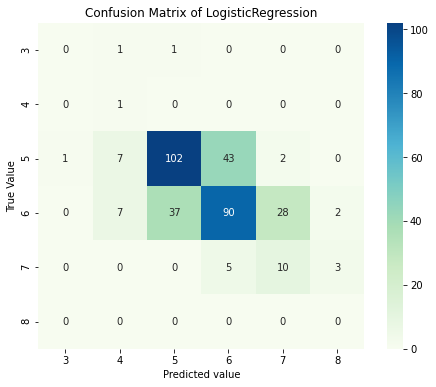

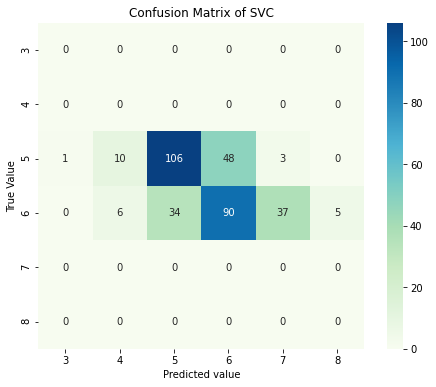

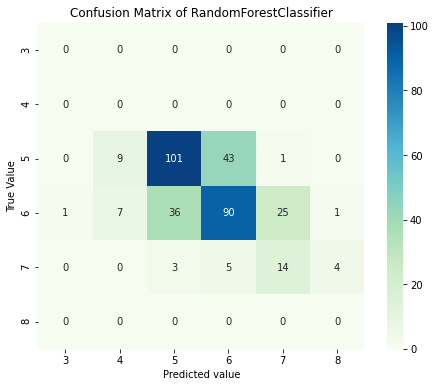

In [112]:
#混淆矩阵
dic={'lgr':conf_lgr,'svc':conf_svc,'rfc':conf_rfc}
dic1 = {'lgr':'LogisticRegression','svc':'SVC','rfc':'RandomForestClassifier'}
for i in ['lgr','svc','rfc']:
    fig = plt.figure(figsize=[8,6])
    plt.title('Confusion Matrix of {}'.format(dic1[i]))
    sns.heatmap(dic[i], cmap='GnBu', square=True, annot=True, xticklabels=[3,4,5,6,7,8], yticklabels=[3,4,5,6,7,8],fmt='d')
    plt.xlabel('Predicted value')
    plt.ylabel('True Value')
    plt.show()
    fig.savefig('CM_{}.jpg'.format(dic1[i]))
